## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#### Change your present working directory

In [0]:
import os
os.chdir('/content/drive/My Drive/AI/Labs/Internal/9th/')

In [0]:
os.getcwd()

'/content/drive/My Drive/AI/Labs/Internal/9th'

### Load your data file

In [0]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/Labs/Internal/9th/daily-minimum-temperatures-in-me.csv')

In [0]:
df.head(5)

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


#### Plot data

Text(0.5, 1.0, 'A time-series graph of Temperature')

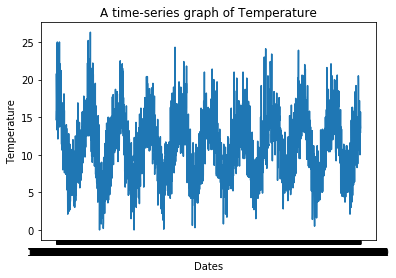

In [0]:
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['Temperature'])
plt.xlabel('Dates')
plt.ylabel('Temperature')
plt.title('A time-series graph of Temperature')

#### Descibe your dataframe

In [0]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


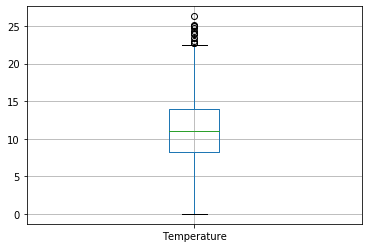

In [0]:
df.boxplot(column='Temperature')

#### Check for null values

In [0]:
df.isnull().sum()

Date           0
Temperature    0
dtype: int64

#### Drop null values

In [0]:
#Since no null values are present not dropping any null values

#### Get the representation of the distribution of data in the form of histogram

(array([ 53., 181., 564., 862., 830., 670., 347., 102.,  32.,   9.]),
 array([ 0.  ,  2.63,  5.26,  7.89, 10.52, 13.15, 15.78, 18.41, 21.04,
        23.67, 26.3 ]),
 <a list of 10 Patch objects>)

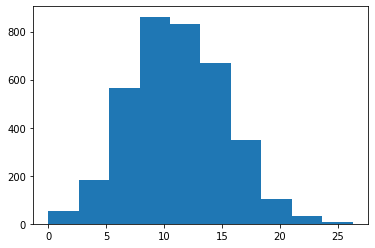

In [0]:
plt.hist(df['Temperature'])

#### Check the maximum and minimum values

In [0]:
print("the maximum value is :",df.max())
print("The minimum value is :",df.min())

the maximum value is : Date           1990-12-31
Temperature          26.3
dtype: object
The minimum value is : Date           1981-01-01
Temperature             0
dtype: object


### Normalize the data

In [0]:
df1 = df.copy()

In [0]:
df.drop(columns='Date',inplace = True)

In [0]:
df.shape

(3650, 1)

In [0]:
import numpy as np

In [0]:
#df['Temperature'].values.shape

In [0]:
#df1 = np.expand_dims(df['Temperature'],axis=1)
#df1.shape

In [0]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df = scale.fit_transform(df)

#### Check the maximum and minimum values of scaled data

In [0]:
df.max()

1.0

In [0]:
df.min()

0.0

#### Look into some of the scaled values

In [0]:
df

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       ...,
       [0.51330798],
       [0.59695817],
       [0.49429658]])

In [0]:
df.shape

(3650, 1)

### Split data into Training and Testing

In [0]:
j = int(len(df)*0.7)
print(j)

2555


In [0]:
for i in range(j):
   train_set = df[:i,:]
   test_set = df[len(train_set):,:]

In [0]:
train_set

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       ...,
       [0.53992395],
       [0.54372624],
       [0.50570342]])

In [0]:
test_set

array([[0.63498099],
       [0.58174905],
       [0.54372624],
       ...,
       [0.51330798],
       [0.59695817],
       [0.49429658]])

#### Print train and test size

In [0]:
train_set.size

2554

In [0]:
train_set.shape

(2554, 1)

In [0]:
test_set.size

1096

In [0]:
test_set.shape

(1096, 1)

## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
#window - how long the sequence will be
def create_dataset(dataset, window=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-window):
        
        a = dataset[i:(i+window), 0]        
        dataX.append(a)
        dataY.append(dataset[i + window, 0])
    
    return np.array(dataX), np.array(dataY)

In [0]:
X_train,y_train=create_dataset(train_set,1)
X_test,y_test=create_dataset(test_set,1)

#### Use function to get training and test set

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [0]:
x_train = np.reshape(X_train,(X_train.shape[0],1,1))
x_test = np.reshape(X_test,(X_test.shape[0],1,1))

## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,BatchNormalization
seq = Sequential()
seq.add(LSTM(32,input_shape=(1,1)))
seq.add(BatchNormalization())
seq.add(Dense(1))

In [0]:
seq.compile(optimizer='adam',loss='mse')

### Summarize your model

In [0]:
seq.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,513
Trainable params: 4,449
Non-trainable params: 64
_________________________________________________________________


### Train the model

In [0]:
seq.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 80)

Train on 2553 samples, validate on 1095 samples
Epoch 1/80
2553/2553 [==============================] - 2s 701us/sample - loss: 0.0541 - val_loss: 0.0218
Epoch 2/80
2553/2553 [==============================] - 0s 105us/sample - loss: 0.0105 - val_loss: 0.0219
Epoch 3/80
2553/2553 [==============================] - 0s 114us/sample - loss: 0.0105 - val_loss: 0.0202
Epoch 4/80
2553/2553 [==============================] - 0s 110us/sample - loss: 0.0104 - val_loss: 0.0197
Epoch 5/80
2553/2553 [==============================] - 0s 108us/sample - loss: 0.0103 - val_loss: 0.0174
Epoch 6/80
2553/2553 [==============================] - 0s 108us/sample - loss: 0.0107 - val_loss: 0.0156
Epoch 7/80
2553/2553 [==============================] - 0s 103us/sample - loss: 0.0105 - val_loss: 0.0132
Epoch 8/80
2553/2553 [==============================] - 0s 109us/sample - loss: 0.0103 - val_loss: 0.0114
Epoch 9/80
2553/2553 [==============================] - 0s 105us/sample - loss: 0.0107 - val_loss: 0.012

## Make Predictions and Evaluate your model

In [0]:
y_pred = seq.predict(x_test)

In [0]:
y_pred

array([[0.5747679 ],
       [0.53895164],
       [0.5128933 ],
       ...,
       [0.49441943],
       [0.4917648 ],
       [0.54926455]], dtype=float32)

In [0]:
y_pred = scale.inverse_transform(y_pred)

## Plot the results

In [0]:
df1.drop(columns='Date',inplace=True)

In [0]:
df1

,Temperature
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
...,...
3645,14.0
3646,13.6
3647,13.5
3648,15.7


In [0]:
df2 = df1.iloc[2554:,:]

In [0]:
df2.reset_index(drop=True,inplace=True)

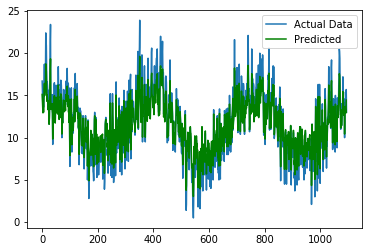

In [237]:
plt.plot(df2)
plt.plot(y_pred,'g')
plt.legend(('Actual Data','Predicted'))